In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import Adam

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
california_data = fetch_california_housing()

In [3]:
data = pd.DataFrame(california_data["data"], columns=california_data.feature_names)
data["Target"] = california_data['target']
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
# numpy arrays
Data = california_data['data']
target = california_data['target']

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(Data)
normalized_data

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.00149943, 0.5674814 ,
        0.21115538],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.00114074, 0.565356  ,
        0.21215139],
       [0.46602805, 1.        , 0.05275646, ..., 0.00169796, 0.5642933 ,
        0.21015936],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.0013144 , 0.73219979,
        0.31175299],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.0011515 , 0.73219979,
        0.30179283],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.00154886, 0.72582359,
        0.30976096]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.3, random_state=123)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# to tensors.
X_train, X_test, y_train, y_test = [torch.Tensor(d).to(device) for d in [X_train, X_test, y_train, y_test]]
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

In [8]:
input_size = X_train.shape[-1]
output_size = y_train.shape[-1]

criterion = nn.MSELoss()

1 Design the network

Epoch [10/200], Train Loss: 5.0695, Test Loss: 4.9257
Epoch [20/200], Train Loss: 4.6055, Test Loss: 4.4660
Epoch [30/200], Train Loss: 4.1319, Test Loss: 3.9953
Epoch [40/200], Train Loss: 3.6393, Test Loss: 3.5056
Epoch [50/200], Train Loss: 3.1297, Test Loss: 3.0005
Epoch [60/200], Train Loss: 2.6197, Test Loss: 2.4990
Epoch [70/200], Train Loss: 2.1433, Test Loss: 2.0366
Epoch [80/200], Train Loss: 1.7425, Test Loss: 1.6553
Epoch [90/200], Train Loss: 1.4508, Test Loss: 1.3857
Epoch [100/200], Train Loss: 1.2774, Test Loss: 1.2331
Epoch [110/200], Train Loss: 1.1998, Test Loss: 1.1706
Epoch [120/200], Train Loss: 1.1740, Test Loss: 1.1527
Epoch [130/200], Train Loss: 1.1630, Test Loss: 1.1442
Epoch [140/200], Train Loss: 1.1518, Test Loss: 1.1333
Epoch [150/200], Train Loss: 1.1396, Test Loss: 1.1207
Epoch [160/200], Train Loss: 1.1274, Test Loss: 1.1082
Epoch [170/200], Train Loss: 1.1154, Test Loss: 1.0961
Epoch [180/200], Train Loss: 1.1035, Test Loss: 1.0843
Epoch [190/200], Tr

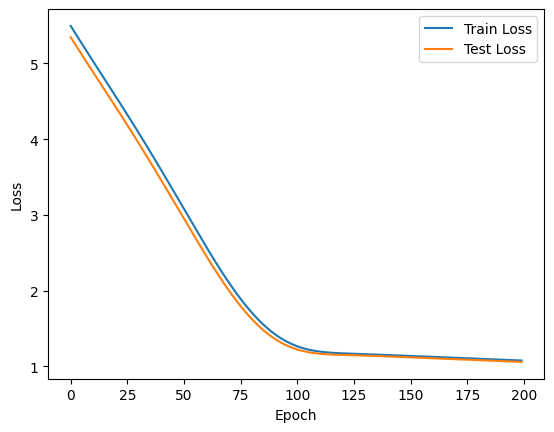

Final Test Loss: 1.0596


In [ ]:
# simple implementation
num_epochs = 200
lr = 1e-3
hidden_layer = 64

train_losses = []
test_losses = []

model = Predict_simple(input_size, hidden_layer, output_size)  # The 2 layer one is equivalent to the one we implemented in numpy
optimizer = Adam(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    # train
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # evaluate
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())
    # print info
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# visualize
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# final evaluate
model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

Epoch [10/200], Train Loss: 5.2531, Test Loss: 5.0236
Epoch [20/200], Train Loss: 3.4879, Test Loss: 3.1919
Epoch [30/200], Train Loss: 1.4776, Test Loss: 1.3382
Epoch [40/200], Train Loss: 1.4583, Test Loss: 1.4538
Epoch [50/200], Train Loss: 1.1865, Test Loss: 1.1692
Epoch [60/200], Train Loss: 1.1645, Test Loss: 1.1333
Epoch [70/200], Train Loss: 1.0934, Test Loss: 1.0816
Epoch [80/200], Train Loss: 1.0381, Test Loss: 1.0200
Epoch [90/200], Train Loss: 0.9822, Test Loss: 0.9626
Epoch [100/200], Train Loss: 0.9225, Test Loss: 0.9053
Epoch [110/200], Train Loss: 0.8607, Test Loss: 0.8425
Epoch [120/200], Train Loss: 0.7970, Test Loss: 0.7796
Epoch [130/200], Train Loss: 0.7342, Test Loss: 0.7171
Epoch [140/200], Train Loss: 0.6776, Test Loss: 0.6623
Epoch [150/200], Train Loss: 0.6338, Test Loss: 0.6207
Epoch [160/200], Train Loss: 0.6062, Test Loss: 0.5950
Epoch [170/200], Train Loss: 0.5917, Test Loss: 0.5815
Epoch [180/200], Train Loss: 0.5822, Test Loss: 0.5723
Epoch [190/200], Tr

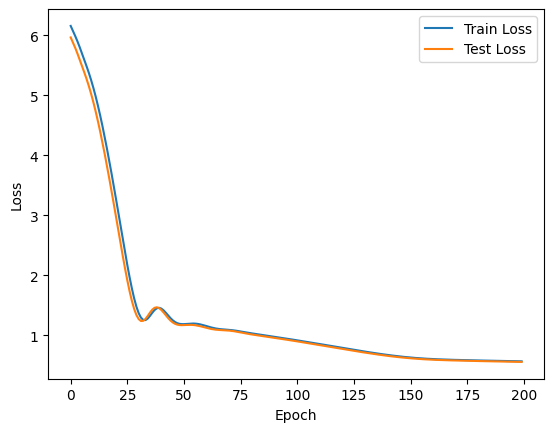

Final Test Loss: 0.5569


In [ ]:
# complex implementation
num_epochs = 200
lr = 1e-3

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

train_losses = []
test_losses = []

model = Predict(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = Adam(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

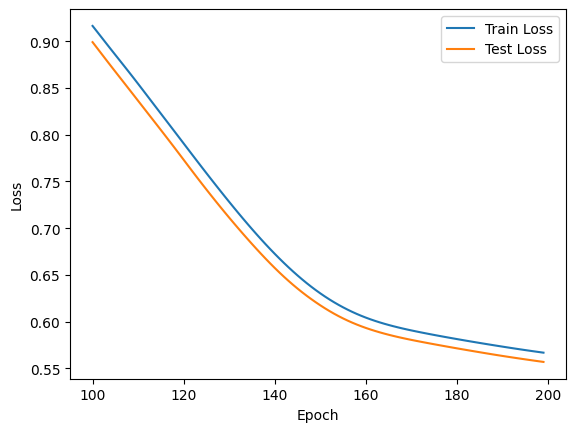

In [ ]:
# in fact, 0.55 is still relatively high
plt.plot(range(int(num_epochs/2), int(num_epochs)), train_losses[int(num_epochs/2):], label='Train Loss')
plt.plot(range(int(num_epochs/2), int(num_epochs)), test_losses[int(num_epochs/2):], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# we need to find a better training strategy

2 Training strategy

Epoch [10/200], Train Loss: 6.4415, Test Loss: 6.2471
Epoch [20/200], Train Loss: 5.0903, Test Loss: 4.8280
Epoch [30/200], Train Loss: 3.5024, Test Loss: 3.2876
Epoch [40/200], Train Loss: 2.3476, Test Loss: 2.2069
Epoch [50/200], Train Loss: 1.7080, Test Loss: 1.6295
Epoch [60/200], Train Loss: 1.4350, Test Loss: 1.3952
Epoch [70/200], Train Loss: 1.3507, Test Loss: 1.3300
Epoch [80/200], Train Loss: 1.3357, Test Loss: 1.3225
Epoch [90/200], Train Loss: 1.3361, Test Loss: 1.3249
Epoch [100/200], Train Loss: 1.3365, Test Loss: 1.3255
Epoch [110/200], Train Loss: 1.3360, Test Loss: 1.3246
Epoch [120/200], Train Loss: 1.3356, Test Loss: 1.3236
Epoch [130/200], Train Loss: 1.3354, Test Loss: 1.3230
Epoch [140/200], Train Loss: 1.3354, Test Loss: 1.3228
Epoch [150/200], Train Loss: 1.3354, Test Loss: 1.3227
Epoch [160/200], Train Loss: 1.3354, Test Loss: 1.3227
Epoch [170/200], Train Loss: 1.3354, Test Loss: 1.3228
Epoch [180/200], Train Loss: 1.3354, Test Loss: 1.3228
Epoch [190/200], Tr

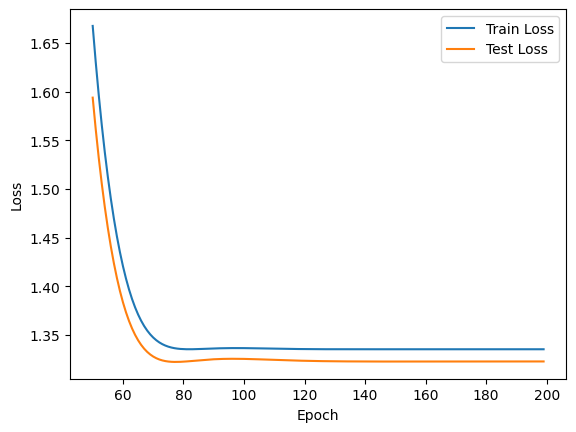

Final Test Loss: 1.3228


In [ ]:
# high learning rate
num_epochs = 200
lr = 1e-1

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

train_losses = []
test_losses = []

model = Predict(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = Adam(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())


    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(range(50, num_epochs), train_losses[50:], label='Train Loss')
plt.plot(range(50, num_epochs), test_losses[50:], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

Epoch [1000/30000], Train Loss: 0.3526, Test Loss: 0.3513
Epoch [2000/30000], Train Loss: 0.3050, Test Loss: 0.3032
Epoch [3000/30000], Train Loss: 0.2757, Test Loss: 0.2750
Epoch [4000/30000], Train Loss: 0.2605, Test Loss: 0.2633
Epoch [5000/30000], Train Loss: 0.2513, Test Loss: 0.2576
Epoch [6000/30000], Train Loss: 0.2437, Test Loss: 0.2533
Epoch [7000/30000], Train Loss: 0.2391, Test Loss: 0.2514
Epoch [8000/30000], Train Loss: 0.2350, Test Loss: 0.2510
Epoch [9000/30000], Train Loss: 0.2287, Test Loss: 0.2458
Epoch [10000/30000], Train Loss: 0.2263, Test Loss: 0.2456
Epoch [11000/30000], Train Loss: 0.2242, Test Loss: 0.2465
Epoch [12000/30000], Train Loss: 0.2232, Test Loss: 0.2462
Epoch [13000/30000], Train Loss: 0.2187, Test Loss: 0.2447
Epoch [14000/30000], Train Loss: 0.2214, Test Loss: 0.2478
Epoch [15000/30000], Train Loss: 0.2196, Test Loss: 0.2480
Epoch [16000/30000], Train Loss: 0.2278, Test Loss: 0.2556
Epoch [17000/30000], Train Loss: 0.2127, Test Loss: 0.2439
Epoch 

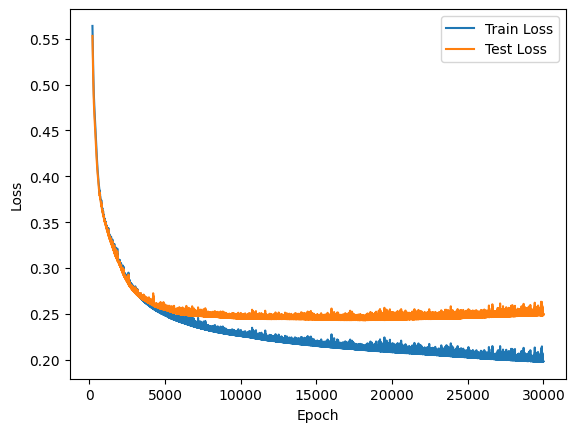

Final Test Loss: 0.2489


In [ ]:
# big epochs
num_epochs = 30000
lr = 1e-3

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

ad_re_train_losses = []
ad_re_test_losses = []

model = Predict(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = Adam(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    ad_re_train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        ad_re_test_losses.append(test_loss.item())


    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(range(200, num_epochs), ad_re_train_losses[200:], label='Train Loss')
plt.plot(range(200, num_epochs), ad_re_test_losses[200:], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

In [ ]:
# it tends to be overfitting and there is fluctuation in the end

3 other experiments

Learning rate scheduler

Epoch [100/3000], Train Loss: 0.5127, Test Loss: 0.5016
learning rate:  0.02
Epoch [200/3000], Train Loss: 0.4337, Test Loss: 0.4345
learning rate:  0.02
Epoch [300/3000], Train Loss: 0.3995, Test Loss: 0.3918
learning rate:  0.015
Epoch [400/3000], Train Loss: 0.3818, Test Loss: 0.3768
learning rate:  0.015
Epoch [500/3000], Train Loss: 0.3568, Test Loss: 0.3526
learning rate:  0.015
Epoch [600/3000], Train Loss: 0.3415, Test Loss: 0.3330
learning rate:  0.01125
Epoch [700/3000], Train Loss: 0.3308, Test Loss: 0.3212
learning rate:  0.01125
Epoch [800/3000], Train Loss: 0.3432, Test Loss: 0.3226
learning rate:  0.01125
Epoch [900/3000], Train Loss: 0.3093, Test Loss: 0.2989
learning rate:  0.0084375
Epoch [1000/3000], Train Loss: 0.2996, Test Loss: 0.2954
learning rate:  0.0084375
Epoch [1100/3000], Train Loss: 0.3022, Test Loss: 0.2929
learning rate:  0.0084375
Epoch [1200/3000], Train Loss: 0.2907, Test Loss: 0.2884
learning rate:  0.006328125
Epoch [1300/3000], Train Loss: 0.2864, 

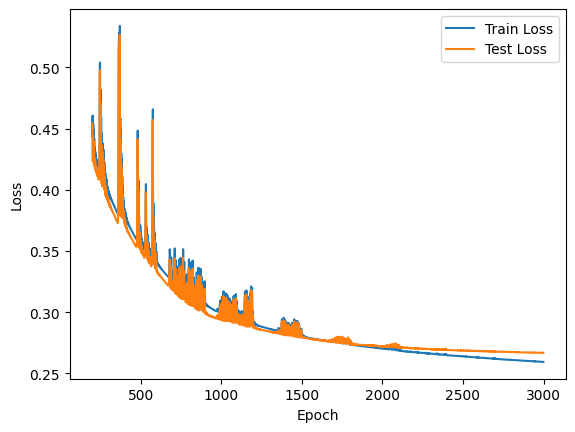

Final Test Loss: 0.2669


In [ ]:
# StepLR
from torch.optim.lr_scheduler import StepLR
num_epochs = 3000
lr = 2e-2

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

train_losses = []
test_losses = []

model = Predict(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=300, gamma=0.75)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    scheduler.step()

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())


    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
        print('learning rate: ',optimizer.param_groups[0]['lr'])

plt.plot(range(200, num_epochs), train_losses[200:], label='Train Loss')
plt.plot(range(200, num_epochs), test_losses[200:], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

Optimizer

Epoch [1000/30000], Train Loss: 1.2826, Test Loss: 1.2676
Epoch [2000/30000], Train Loss: 1.2119, Test Loss: 1.1975
Epoch [3000/30000], Train Loss: 1.0800, Test Loss: 1.0661
Epoch [4000/30000], Train Loss: 0.7948, Test Loss: 0.7818
Epoch [5000/30000], Train Loss: 0.5935, Test Loss: 0.5832
Epoch [6000/30000], Train Loss: 0.5664, Test Loss: 0.5573
Epoch [7000/30000], Train Loss: 0.5557, Test Loss: 0.5466
Epoch [8000/30000], Train Loss: 0.5464, Test Loss: 0.5374
Epoch [9000/30000], Train Loss: 0.5383, Test Loss: 0.5294
Epoch [10000/30000], Train Loss: 0.5315, Test Loss: 0.5226
Epoch [11000/30000], Train Loss: 0.5257, Test Loss: 0.5169
Epoch [12000/30000], Train Loss: 0.5205, Test Loss: 0.5117
Epoch [13000/30000], Train Loss: 0.5159, Test Loss: 0.5071
Epoch [14000/30000], Train Loss: 0.5117, Test Loss: 0.5030
Epoch [15000/30000], Train Loss: 0.5079, Test Loss: 0.4992
Epoch [16000/30000], Train Loss: 0.5045, Test Loss: 0.4957
Epoch [17000/30000], Train Loss: 0.5013, Test Loss: 0.4925
Epoch 

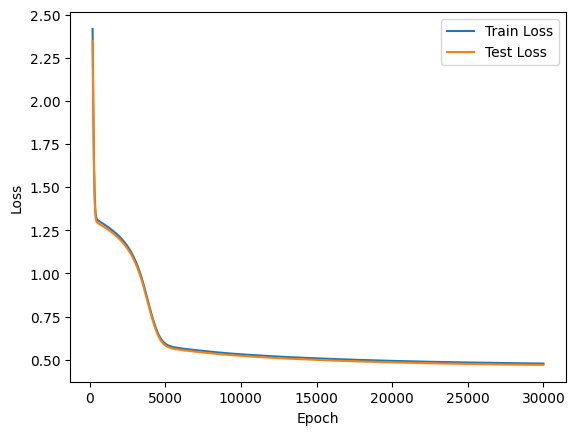

Final Test Loss: 0.4699


In [ ]:
# SGD
from torch.optim import SGD
num_epochs = 30000
lr = 1e-3

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

sg_re_train_losses = []
sg_re_test_losses = []

model = Predict(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = SGD(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    sg_re_train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        sg_re_test_losses.append(test_loss.item())


    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(range(200, num_epochs), sg_re_train_losses[200:], label='Train Loss')
plt.plot(range(200, num_epochs), sg_re_test_losses[200:], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

Epoch [1000/30000], Train Loss: 0.4667, Test Loss: 0.4604
Epoch [2000/30000], Train Loss: 0.4351, Test Loss: 0.4327
Epoch [3000/30000], Train Loss: 0.4095, Test Loss: 0.4091
Epoch [4000/30000], Train Loss: 0.3917, Test Loss: 0.3917
Epoch [5000/30000], Train Loss: 0.3769, Test Loss: 0.3772
Epoch [6000/30000], Train Loss: 0.3624, Test Loss: 0.3645
Epoch [7000/30000], Train Loss: 0.3477, Test Loss: 0.3546
Epoch [8000/30000], Train Loss: 0.3351, Test Loss: 0.3467
Epoch [9000/30000], Train Loss: 0.3212, Test Loss: 0.3377
Epoch [10000/30000], Train Loss: 0.3051, Test Loss: 0.3289
Epoch [11000/30000], Train Loss: 0.2936, Test Loss: 0.3212
Epoch [12000/30000], Train Loss: 0.2975, Test Loss: 0.3377
Epoch [13000/30000], Train Loss: 0.2799, Test Loss: 0.3267
Epoch [14000/30000], Train Loss: 0.2821, Test Loss: 0.3316
Epoch [15000/30000], Train Loss: 0.2795, Test Loss: 0.3268
Epoch [16000/30000], Train Loss: 0.2578, Test Loss: 0.3063
Epoch [17000/30000], Train Loss: 0.2530, Test Loss: 0.3036
Epoch 

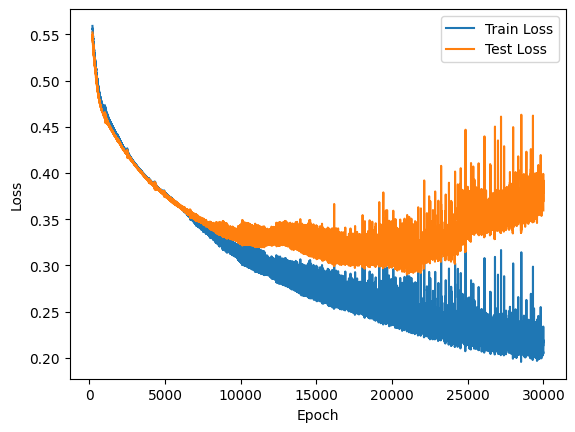

Final Test Loss: 0.3595


In [ ]:
# RMSprop
from torch.optim import RMSprop
num_epochs = 30000
lr = 1e-3

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

rm_re_train_losses = []
rm_re_test_losses = []

model = Predict(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = RMSprop(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    rm_re_train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        rm_re_test_losses.append(test_loss.item())


    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(range(200, num_epochs), rm_re_train_losses[200:], label='Train Loss')
plt.plot(range(200, num_epochs), rm_re_test_losses[200:], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

Activation function

Epoch [1000/30000], Train Loss: 0.5331, Test Loss: 0.5282
Epoch [2000/30000], Train Loss: 0.4608, Test Loss: 0.4512
Epoch [3000/30000], Train Loss: 0.4411, Test Loss: 0.4286
Epoch [4000/30000], Train Loss: 0.4310, Test Loss: 0.4176
Epoch [5000/30000], Train Loss: 0.4201, Test Loss: 0.4056
Epoch [6000/30000], Train Loss: 0.4071, Test Loss: 0.3917
Epoch [7000/30000], Train Loss: 0.3942, Test Loss: 0.3786
Epoch [8000/30000], Train Loss: 0.3839, Test Loss: 0.3690
Epoch [9000/30000], Train Loss: 0.3756, Test Loss: 0.3612
Epoch [10000/30000], Train Loss: 0.3694, Test Loss: 0.3558
Epoch [11000/30000], Train Loss: 0.3653, Test Loss: 0.3519
Epoch [12000/30000], Train Loss: 0.3620, Test Loss: 0.3486
Epoch [13000/30000], Train Loss: 0.3587, Test Loss: 0.3456
Epoch [14000/30000], Train Loss: 0.3555, Test Loss: 0.3427
Epoch [15000/30000], Train Loss: 0.3525, Test Loss: 0.3399
Epoch [16000/30000], Train Loss: 0.3497, Test Loss: 0.3373
Epoch [17000/30000], Train Loss: 0.3470, Test Loss: 0.3350
Epoch 

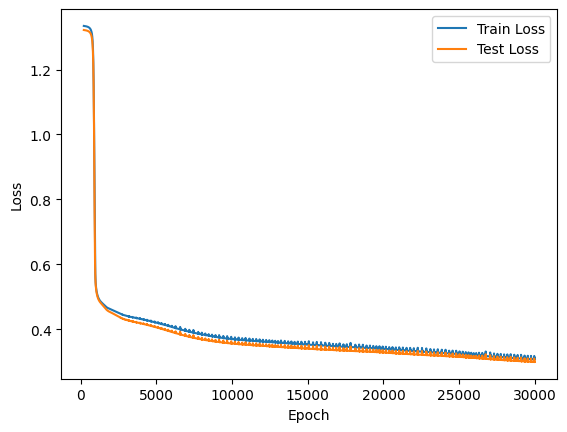

Final Test Loss: 0.2992


In [ ]:
# sigmoid
num_epochs = 30000
lr = 1e-3

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

ad_si_train_losses = []
ad_si_test_losses = []

model = Predict2(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = Adam(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    ad_si_train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        ad_si_test_losses.append(test_loss.item())


    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(range(200, num_epochs), ad_si_train_losses[200:], label='Train Loss')
plt.plot(range(200, num_epochs), ad_si_test_losses[200:], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

Epoch [1000/30000], Train Loss: 0.4423, Test Loss: 0.4308
Epoch [2000/30000], Train Loss: 0.3998, Test Loss: 0.3840
Epoch [3000/30000], Train Loss: 0.3477, Test Loss: 0.3331
Epoch [4000/30000], Train Loss: 0.3185, Test Loss: 0.3063
Epoch [5000/30000], Train Loss: 0.3036, Test Loss: 0.2944
Epoch [6000/30000], Train Loss: 0.2912, Test Loss: 0.2832
Epoch [7000/30000], Train Loss: 0.2869, Test Loss: 0.2825
Epoch [8000/30000], Train Loss: 0.2768, Test Loss: 0.2693
Epoch [9000/30000], Train Loss: 0.2649, Test Loss: 0.2636
Epoch [10000/30000], Train Loss: 0.2580, Test Loss: 0.2599
Epoch [11000/30000], Train Loss: 0.2535, Test Loss: 0.2610
Epoch [12000/30000], Train Loss: 0.2438, Test Loss: 0.2566
Epoch [13000/30000], Train Loss: 0.2382, Test Loss: 0.2547
Epoch [14000/30000], Train Loss: 0.2323, Test Loss: 0.2519
Epoch [15000/30000], Train Loss: 0.2274, Test Loss: 0.2489
Epoch [16000/30000], Train Loss: 0.2217, Test Loss: 0.2455
Epoch [17000/30000], Train Loss: 0.2175, Test Loss: 0.2442
Epoch 

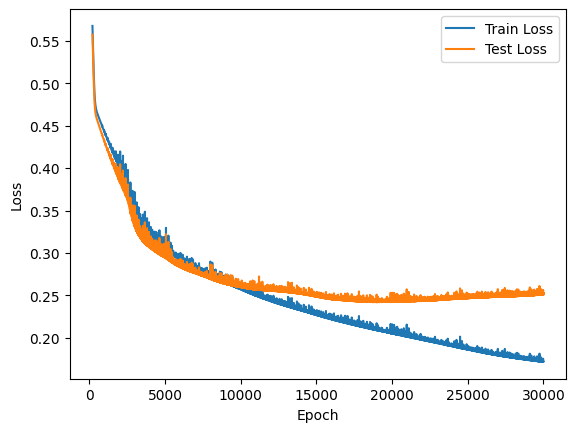

Final Test Loss: 0.2511


In [ ]:
# tanh
num_epochs = 30000
lr = 1e-3

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

ad_ta_train_losses = []
ad_ta_test_losses = []

model = Predict3(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = Adam(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    ad_ta_train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        ad_ta_test_losses.append(test_loss.item())


    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(range(200, num_epochs), ad_ta_train_losses[200:], label='Train Loss')
plt.plot(range(200, num_epochs), ad_ta_test_losses[200:], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

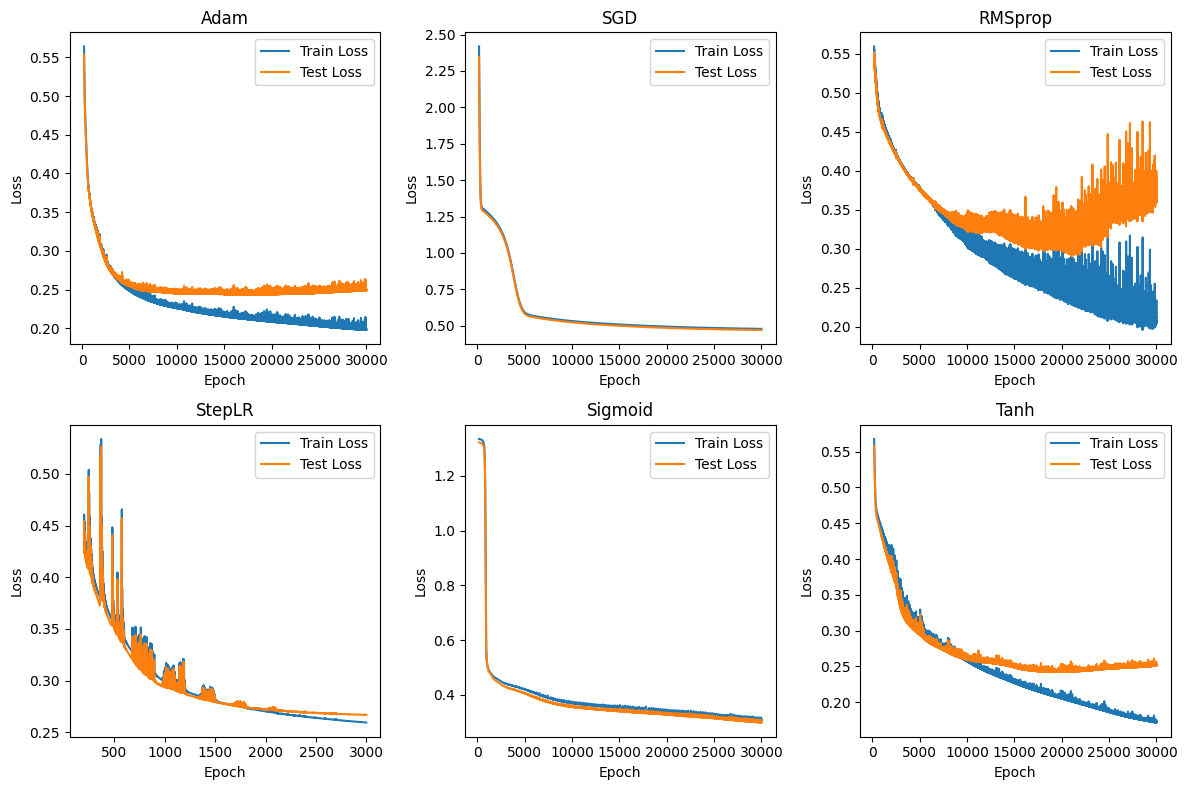

In [ ]:
num_epochs=30000
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

ax = axes[0, 0]
ax.plot(range(200, num_epochs), ad_re_train_losses[200:], label='Train Loss')
ax.plot(range(200, num_epochs), ad_re_test_losses[200:], label='Test Loss')
ax.legend()
ax.set_title('Adam')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax = axes[0, 1]
ax.plot(range(200, num_epochs), sg_re_train_losses[200:], label='Train Loss')
ax.plot(range(200, num_epochs), sg_re_test_losses[200:], label='Test Loss')
ax.legend()
ax.set_title('SGD')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax = axes[0, 2]
ax.plot(range(200, num_epochs), rm_re_train_losses[200:], label='Train Loss')
ax.plot(range(200, num_epochs), rm_re_test_losses[200:], label='Test Loss')
ax.legend()
ax.set_title('RMSprop')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax = axes[1, 0]
ax.plot(range(200, 3000), train_losses[200:], label='Train Loss')
ax.plot(range(200, 3000), test_losses[200:], label='Test Loss')
ax.legend()
ax.set_title('StepLR')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax = axes[1, 1]
ax.plot(range(200, num_epochs), ad_si_train_losses[200:], label='Train Loss')
ax.plot(range(200, num_epochs), ad_si_test_losses[200:], label='Test Loss')
ax.legend()
ax.set_title('Sigmoid')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax = axes[1, 2]
ax.plot(range(200, num_epochs), ad_ta_train_losses[200:], label='Train Loss')
ax.plot(range(200, num_epochs), ad_ta_test_losses[200:], label='Test Loss')
ax.legend()
ax.set_title('Tanh')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

plt.tight_layout()

plt.show()




In [10]:
# visualization of effects
num_epochs = 30000
lr = 1e-3

h_layer1 = 128
h_layer2 = 64
h_layer3 = 32

ad_re_train_losses = []
ad_re_test_losses = []

model = Predict(input_size, h_layer1, h_layer2, h_layer3, output_size)
optimizer = Adam(model.parameters(), lr=lr)
model.to(device)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    ad_re_train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        ad_re_test_losses.append(test_loss.item())


    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    print(f'Final Test Loss: {test_loss.item():.4f}')

Epoch [1000/30000], Train Loss: 0.3618, Test Loss: 0.3592
Epoch [2000/30000], Train Loss: 0.3076, Test Loss: 0.3052
Epoch [3000/30000], Train Loss: 0.2755, Test Loss: 0.2747
Epoch [4000/30000], Train Loss: 0.2540, Test Loss: 0.2609
Epoch [5000/30000], Train Loss: 0.2432, Test Loss: 0.2558
Epoch [6000/30000], Train Loss: 0.2395, Test Loss: 0.2552
Epoch [7000/30000], Train Loss: 0.2312, Test Loss: 0.2506
Epoch [8000/30000], Train Loss: 0.2260, Test Loss: 0.2482
Epoch [9000/30000], Train Loss: 0.2194, Test Loss: 0.2461
Epoch [10000/30000], Train Loss: 0.2186, Test Loss: 0.2478
Epoch [11000/30000], Train Loss: 0.2164, Test Loss: 0.2475
Epoch [12000/30000], Train Loss: 0.2100, Test Loss: 0.2447
Epoch [13000/30000], Train Loss: 0.2065, Test Loss: 0.2440
Epoch [14000/30000], Train Loss: 0.2053, Test Loss: 0.2454
Epoch [15000/30000], Train Loss: 0.2013, Test Loss: 0.2435
Epoch [16000/30000], Train Loss: 0.1993, Test Loss: 0.2437
Epoch [17000/30000], Train Loss: 0.1990, Test Loss: 0.2452
Epoch 

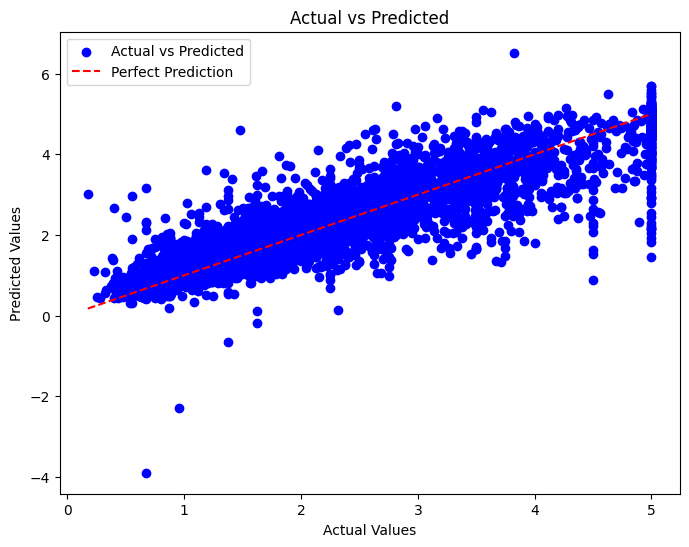

In [11]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_outputs, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
class Predict_simple(nn.Module):
  def __init__(self, num_inp, num_hidden, num_out):
    super(Predict_simple, self).__init__()

    self.layer_1 = nn.Linear(num_inp, num_hidden)
    self.layer_2 = nn.Linear(num_hidden, num_out)

    self.hidden_activation = nn.ReLU()

  def forward(self, x):
    z1 = self.layer_1(x)
    a1 = self.hidden_activation(z1)
    z2 = self.layer_2(a1)

    return z2

In [9]:
class Predict(nn.Module):
  def __init__(self, num_inp, num_hidden1, num_hidden2, num_hidden3, num_out):
    super(Predict, self).__init__()

    self.layer_1 = nn.Linear(num_inp, num_hidden1)
    self.layer_2 = nn.Linear(num_hidden1, num_hidden2)
    self.layer_3 = nn.Linear(num_hidden2, num_hidden3)
    self.layer_4 = nn.Linear(num_hidden3, num_out)

    self.hidden_activation = nn.ReLU()

  def forward(self, x):
    z1 = self.layer_1(x)
    a1 = self.hidden_activation(z1)
    z2 = self.layer_2(a1)
    a2 = self.hidden_activation(z2)
    z3 = self.layer_3(a2)
    a3 = self.hidden_activation(z3)
    z4 = self.layer_4(a3)

    return z4

In [ ]:
class Predict2(nn.Module):
  def __init__(self, num_inp, num_hidden1, num_hidden2, num_hidden3, num_out):
    super(Predict2, self).__init__()

    self.layer_1 = nn.Linear(num_inp, num_hidden1)
    self.layer_2 = nn.Linear(num_hidden1, num_hidden2)
    self.layer_3 = nn.Linear(num_hidden2, num_hidden3)
    self.layer_4 = nn.Linear(num_hidden3, num_out)

  def forward(self, x):
    z1 = self.layer_1(x)
    a1 = torch.sigmoid(z1)
    z2 = self.layer_2(a1)
    a2 = torch.sigmoid(z2)
    z3 = self.layer_3(a2)
    a3 = torch.sigmoid(z3)
    z4 = self.layer_4(a3)

    return z4

In [ ]:
class Predict3(nn.Module):
  def __init__(self, num_inp, num_hidden1, num_hidden2, num_hidden3, num_out):
    super(Predict3, self).__init__()

    self.layer_1 = nn.Linear(num_inp, num_hidden1)
    self.layer_2 = nn.Linear(num_hidden1, num_hidden2)
    self.layer_3 = nn.Linear(num_hidden2, num_hidden3)
    self.layer_4 = nn.Linear(num_hidden3, num_out)

  def forward(self, x):
    z1 = self.layer_1(x)
    a1 = torch.tanh(z1)
    z2 = self.layer_2(a1)
    a2 = torch.tanh(z2)
    z3 = self.layer_3(a2)
    a3 = torch.tanh(z3)
    z4 = self.layer_4(a3)

    return z4